# Coursera - Machine Learning Exercise 1 - Linear Regression

### Work done below is a walkthrough of John Wittenauer's IPython notebooks repository on github.
Link: https://github.com/jdwittenauer/ipython-notebooks

First part of the exercise - Linear Regression with one variable to predict profits for a food truck.

Data available: Populations of various cities(x) and profits of a food truck in those cities(y).

First, importing necessary libraries and taking a look at the data.

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [130]:
import os
path = os.getcwd() + '\data\ex1data1.txt'
data = pd.read_csv(path, header = None, names = ['Population', 'Profit']) # check data for possible headers beforehand
# names takes as parameter a list of items to be used as column names

data.head() # prints the first five rows

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [131]:
'''
with open('ex1data1_test.txt', 'w') as f:
    for line in open('ex1data1.txt', 'r'):
        f.write(','.join(line.split('\t')))
'''
# Wrote the data into a new file in order to switch the previously tab separated
# values on excel, back to CSV

"\nwith open('ex1data1_test.txt', 'w') as f:\n    for line in open('ex1data1.txt', 'r'):\n        f.write(','.join(line.split('\t')))\n"

In [132]:
data.describe() # see basic stats

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Last step of preliminary introduction with the data: Plot it

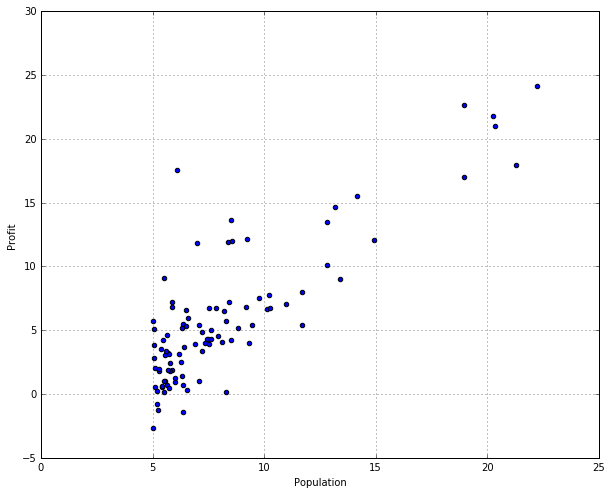

In [182]:
data.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize = (10,8)) # the %matplotlib inline plots the plots in line.
plt.grid()

Lets take two approaches:

1) Apply gradient descent to minimize the cost function associated with the regression model iteratively

2) Import sklearn and let it do its job
    
Approach 1:   

In [10]:
def computeCost(X,y,theta):
    '''
    Takes in the MATRICES X, y and theta, performs the following operations and returns a cost
    '''
    error_matrix_squared = np.power(((X*theta.T) - y), 2)
    return np.sum(error_matrix_squared) / (2*len(X))


X is of the shape (m,1) which should be changed to (m,2) by adding a column of ones at index 0. 

Theta is a matrix of shape (1,2) which should be transposed by using the '.T' method on the matrix resulting in a (m,1) matrix which can then subtract the matrix y and square the resulting matrix (operations on each element, we're working with Numpy here)


Function is ready, lets morph the data

In [26]:
data.insert(0,'Ones',1)

In [51]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Set independent and dependent variables

In [112]:
X = data.loc[:,['Ones', 'Population']]
y = data.iloc[:,2:3] # --> if loc is used and the number of columns is 1, 
# it returns a series object

In [60]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Never a bad idea to keep a constant eye on the behaviour of data.

Now, convert the X(dataframe) and y(pd.series) into matrices and also create a theta matrix.

In [61]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [62]:
theta

matrix([[0, 0]])

Take a look at the shapes of the matrices

In [63]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Check computecost

In [64]:
computeCost(X,y,theta)

32.072733877455676

All good for now, create gradient descent function, throw it all in and we're done.

In [91]:
temp = np.matrix(np.zeros(theta.shape))

In [93]:
theta

matrix([[0, 0]])

In [97]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) # .ravel() flattens the matrix, see documentation for details
    cost = np.zeros(iters)
    
    for i in range(iters):    
        error_matrix = (X*theta.T) - y   # compute error matrix
        for j in range(parameters):     # for each theta parameter
            derivative_term =  np.multiply(error_matrix, X[:,j])     # compute derivative term to use to update each parameter
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(derivative_term))      # update each parameter
        
        theta = temp      # update theta matrix
        cost[i] = computeCost(X,y,theta)      # store cost at each step into cost matrix
    
    return theta, cost

Initialize the learning rate alpha and the number of iterations GD algo has to run for.

In [95]:
alpha = 0.01
iters = 1000

In [100]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [101]:
# cost of the trained model is:
computeCost(X, y, g)

4.5159555030789118

Plot the linear model along with the data to see the fit.

y is modeled as y = c + m*x, the straight line. g is a matrix of theta parameters, g[0,0] and g[0,1] are typical locations of matrix jargon [row, column]

An integer + A matrix adds the integer to each element of the matrix, that's how Numpy works, that's why it's so useful, to facilitate necessary matrix operations.

In [114]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + (g[0,1]*x) 

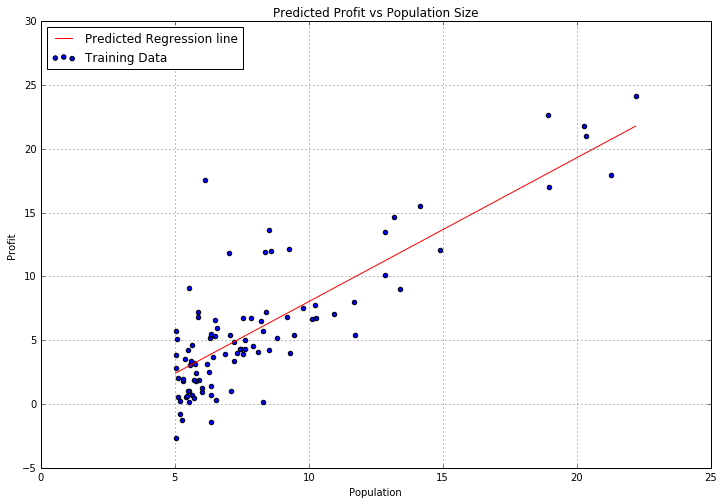

In [118]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x, f, 'r', label = 'Predicted Regression line')
ax.scatter(data.Population, data.Profit, label = 'Training Data')
ax.legend(loc = 2)
ax.grid()
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population Size')

Fit of the line looks good. 

Lets plot the cost vector returned by Gradient Descent against the number of iterations.

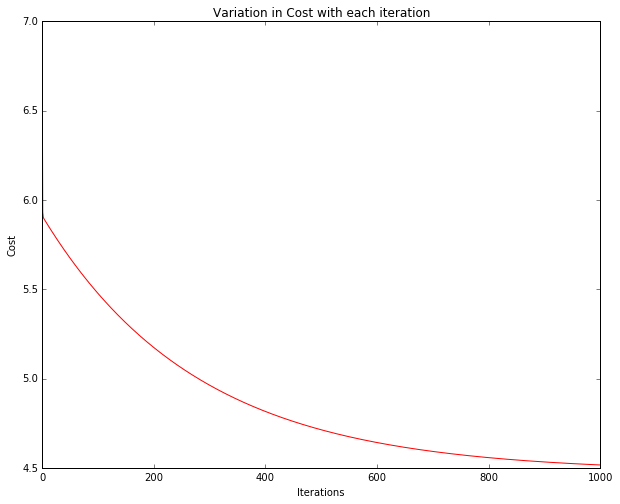

In [122]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Variation in Cost with each iteration')

# Linear Regression with Multiple Variables

Now, lets take the approach 2(importing sklearn and using its linear model) to tackle linear regression with multiple variables. 

The file 'ex1data2.txt' contains  a housing price dataset with 2 independent variables:
    
    1) Size of the house in square feet
    2) Number of bedrooms

The target variable is the price of the house. Lets take a look at the data and quickly build a linear model.

In [124]:
path = os.getcwd() + '\data\ex1data2.txt'
data2 = pd.read_csv(path, header = None, names = ['Size', 'Bedrooms', 'Price'])

In [125]:
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


As parameters of the theta matrix are dependent on variation and magnitude of the independent variables(X), we need to make sure the contributions of X variables(features) to the model are proportionate to the variance they bring along with them.

Number of bedrooms variable is, as evident, nullified by the size of the house variable.

The pre-processing step of normalizing the features before taking such an approach is necessary and easy. With pandas.

In [140]:
data2 = (data2 - data2.mean()) / data2.std()

data2.shape

(47, 3)

In [138]:
data2.head() # Normalized!

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [141]:
cols = data2.shape[1]
X2 = data2.iloc[:,:cols-1]
y2 = data2.iloc[:,cols-1:]

In [134]:
from sklearn import linear_model

In [144]:
model = linear_model.LinearRegression()
model.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
y_preds = model.predict(X2) # get model's predictions

y_bar = y2-y_preds
y_bar = y_bar['Price']
# To plot

<Container object of 47 artists>

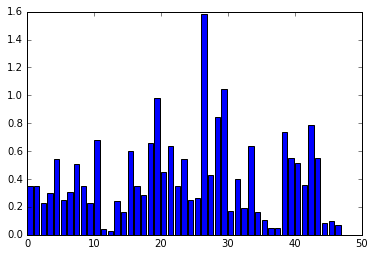

In [181]:
plt.bar(np.arange(len(y_preds)), abs(y_bar), width = 0.8)

Can use model.predict(input) to estimate price of a house. Pre-processing steps include cleaning, dealing with missing values, normalizing etc.

Here we just had to normalize. Next --> Exercise 2 - Logistic Regression - Classification.